In [2]:
import pandas as pd

df = pd.read_csv("SalesKaggle3.csv")
df.head()

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54
2,4,Historical,612701,0.0,0.0,D,0,0,340464.0,46.00,2013,34,30.19,27.97
3,6,Historical,115883,1.0,1.0,D,4,1,334011.0,100.00,2006,20,133.93,83.15
4,7,Historical,863939,1.0,1.0,D,2,1,1287938.0,121.95,2010,28,4.00,23.99


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198917 entries, 0 to 198916
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order             198917 non-null  int64  
 1   File_Type         198917 non-null  object 
 2   SKU_number        198917 non-null  int64  
 3   SoldFlag          75996 non-null   float64
 4   SoldCount         75996 non-null   float64
 5   MarketingType     198917 non-null  object 
 6   ReleaseNumber     198917 non-null  int64  
 7   New_Release_Flag  198917 non-null  int64  
 8   StrengthFactor    198917 non-null  float64
 9   PriceReg          198917 non-null  float64
 10  ReleaseYear       198917 non-null  int64  
 11  ItemCount         198917 non-null  int64  
 12  LowUserPrice      198917 non-null  float64
 13  LowNetPrice       198917 non-null  float64
dtypes: float64(6), int64(6), object(2)
memory usage: 21.2+ MB


In [4]:
print(df["SoldFlag"].value_counts() / len(df["SoldFlag"]))

0.0    0.316715
1.0    0.065334
Name: SoldFlag, dtype: float64


In [5]:
print(df["File_Type"].value_counts() / len(df["File_Type"]))

Active        0.617951
Historical    0.382049
Name: File_Type, dtype: float64


In [6]:
df.groupby(["File_Type"])['Order'].count()

File_Type
Active        122921
Historical     75996
Name: Order, dtype: int64

In [7]:
# 재고 가치
df = df[df["PriceReg"] > 0]
df["stockvalue"] = df["ItemCount"] * df["LowUserPrice"]

In [8]:
# 재고 소진 추정 기간
df["MOC"] = df.ItemCount.sum() / (df.SoldCount.sum()/6)

In [9]:
# 재고 보관 기간
df["stockage"] = 2024 - df["ReleaseYear"]

In [10]:
# 판매 할인 비율
import numpy as np
df['discount_rate'] = 100 - ((df['LowUserPrice'] / df['PriceReg']) * 100)
df['discount_rate'] = df['discount_rate'].replace([-np.inf, np.nan], 0)
# df['discount'] = np.round((df['PriceReg'] - df['LowNetPrice']) / df['PriceReg'])

In [11]:
df[['stockvalue','MOC','stockage','discount_rate']]

,stockvalue,MOC,stockage,discount_rate
0,231.76,2043.266783,9,35.607913
1,0.00,2043.266783,19,100.000000
2,1026.46,2043.266783,11,34.369565
3,2678.60,2043.266783,18,-33.930000
4,112.00,2043.266783,14,96.719967
...,...,...,...,...
198912,456.84,2043.266783,18,88.390284
198913,546.00,2043.266783,15,96.599190
198914,551.54,2043.266783,12,52.040000
198915,630.66,2043.266783,23,41.597444


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196368 entries, 0 to 198916
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order             196368 non-null  int64  
 1   File_Type         196368 non-null  object 
 2   SKU_number        196368 non-null  int64  
 3   SoldFlag          74601 non-null   float64
 4   SoldCount         74601 non-null   float64
 5   MarketingType     196368 non-null  object 
 6   ReleaseNumber     196368 non-null  int64  
 7   New_Release_Flag  196368 non-null  int64  
 8   StrengthFactor    196368 non-null  float64
 9   PriceReg          196368 non-null  float64
 10  ReleaseYear       196368 non-null  int64  
 11  ItemCount         196368 non-null  int64  
 12  LowUserPrice      196368 non-null  float64
 13  LowNetPrice       196368 non-null  float64
 14  stockvalue        196368 non-null  float64
 15  MOC               196368 non-null  float64
 16  stockage          19

In [13]:
df.describe()

,Order,SKU_number,SoldFlag,SoldCount,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,stockvalue,MOC,stockage,discount_rate
count,196368.000000,1.963680e+05,74601.000000,74601.000000,196368.000000,196368.00000,1.963680e+05,196368.000000,196368.000000,196368.000000,196368.000000,196368.000000,196368.000000,1.963680e+05,196368.000000,1.963680e+05
mean,106933.600673,8.527304e+05,0.171083,0.322275,3.411213,0.64208,1.096642e+06,92.075130,2006.093997,41.694013,30.827578,46.386144,1292.669076,2.043267e+03,17.906003,4.271824e+01
std,60070.716934,8.632254e+05,0.376584,1.170068,3.866541,0.47939,1.481100e+06,86.673039,8.872731,37.675745,69.274519,121.884278,2920.438238,2.273743e-13,8.872731,2.898268e+03
min,2.000000,5.000100e+04,0.000000,0.000000,0.000000,0.00000,6.275000e+00,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,2.043267e+03,6.000000,-1.187300e+06
25%,56202.750000,2.129075e+05,0.000000,0.000000,1.000000,0.00000,1.598679e+05,43.400000,2003.000000,21.000000,4.910000,17.970000,201.780000,2.043267e+03,13.000000,4.000893e+01
50%,109205.500000,6.098530e+05,0.000000,0.000000,2.000000,1.00000,5.771025e+05,69.990000,2007.000000,32.000000,16.000000,33.980000,456.300000,2.043267e+03,17.000000,7.286878e+01
75%,158724.250000,9.026610e+05,0.000000,0.000000,5.000000,1.00000,1.409014e+06,117.010000,2011.000000,50.000000,39.980000,55.190000,1263.462500,2.043267e+03,21.000000,9.199199e+01
max,208027.000000,3.960788e+06,1.000000,73.000000,99.000000,1.00000,1.738445e+07,12671.480000,2018.000000,2542.000000,14140.210000,19138.790000,296944.410000,2.043267e+03,2024.000000,1.000000e+02


In [14]:
df.head()

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,stockvalue,MOC,stockage,discount_rate
0,2,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84,231.76,2043.266783,9,35.607913
1,3,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54,0.00,2043.266783,19,100.000000
2,4,Historical,612701,0.0,0.0,D,0,0,340464.0,46.00,2013,34,30.19,27.97,1026.46,2043.266783,11,34.369565
3,6,Historical,115883,1.0,1.0,D,4,1,334011.0,100.00,2006,20,133.93,83.15,2678.60,2043.266783,18,-33.930000
4,7,Historical,863939,1.0,1.0,D,2,1,1287938.0,121.95,2010,28,4.00,23.99,112.00,2043.266783,14,96.719967


In [15]:
df = df[df["File_Type"] == "Historical"]

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])

df.head()

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,stockvalue,MOC,stockage,discount_rate
0,2,0,1737127,0.0,0.0,0,15,1,682743.0,44.99,2015,8,28.97,31.84,231.76,2043.266783,9,35.607913
1,3,0,3255963,0.0,0.0,0,7,1,1016014.0,24.81,2005,39,0.00,15.54,0.00,2043.266783,19,100.000000
2,4,0,612701,0.0,0.0,0,0,0,340464.0,46.00,2013,34,30.19,27.97,1026.46,2043.266783,11,34.369565
3,6,0,115883,1.0,1.0,0,4,1,334011.0,100.00,2006,20,133.93,83.15,2678.60,2043.266783,18,-33.930000
4,7,0,863939,1.0,1.0,0,2,1,1287938.0,121.95,2010,28,4.00,23.99,112.00,2043.266783,14,96.719967


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74601 entries, 0 to 75995
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order             74601 non-null  int64  
 1   File_Type         74601 non-null  int32  
 2   SKU_number        74601 non-null  int64  
 3   SoldFlag          74601 non-null  float64
 4   SoldCount         74601 non-null  float64
 5   MarketingType     74601 non-null  int32  
 6   ReleaseNumber     74601 non-null  int64  
 7   New_Release_Flag  74601 non-null  int64  
 8   StrengthFactor    74601 non-null  float64
 9   PriceReg          74601 non-null  float64
 10  ReleaseYear       74601 non-null  int64  
 11  ItemCount         74601 non-null  int64  
 12  LowUserPrice      74601 non-null  float64
 13  LowNetPrice       74601 non-null  float64
 14  stockvalue        74601 non-null  float64
 15  MOC               74601 non-null  float64
 16  stockage          74601 non-null  int64 

In [18]:
df = df[df.SoldFlag.notnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74601 entries, 0 to 75995
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order             74601 non-null  int64  
 1   File_Type         74601 non-null  int32  
 2   SKU_number        74601 non-null  int64  
 3   SoldFlag          74601 non-null  float64
 4   SoldCount         74601 non-null  float64
 5   MarketingType     74601 non-null  int32  
 6   ReleaseNumber     74601 non-null  int64  
 7   New_Release_Flag  74601 non-null  int64  
 8   StrengthFactor    74601 non-null  float64
 9   PriceReg          74601 non-null  float64
 10  ReleaseYear       74601 non-null  int64  
 11  ItemCount         74601 non-null  int64  
 12  LowUserPrice      74601 non-null  float64
 13  LowNetPrice       74601 non-null  float64
 14  stockvalue        74601 non-null  float64
 15  MOC               74601 non-null  float64
 16  stockage          74601 non-null  int64 

In [19]:
print(df["SoldFlag"].value_counts() / len(df["SoldFlag"]))

0.0    0.828917
1.0    0.171083
Name: SoldFlag, dtype: float64


In [20]:
X = df.drop(columns=["SoldFlag","SoldCount","Order","SKU_number","File_Type","ReleaseYear"])
y = df["SoldFlag"]

In [21]:
df[df["SoldFlag"]==1].shape

(12763, 18)

In [23]:
df.corr()

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,stockvalue,MOC,stockage,discount_rate
Order,1.000000,NaN,0.056629,-0.176316,-0.121499,0.875879,-0.034297,0.101351,-0.190519,-0.145080,0.106232,-0.090235,-0.141787,-0.016420,-0.220413,NaN,-0.106232,0.003332
File_Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SKU_number,0.056629,NaN,1.000000,-0.109494,-0.073431,0.081214,-0.130209,-0.158076,0.244580,-0.100822,-0.190766,-0.253490,-0.062030,0.055443,-0.201140,NaN,0.190766,0.005390
SoldFlag,-0.176316,NaN,-0.109494,1.000000,0.606274,-0.222968,0.076395,0.006152,-0.147288,0.086006,0.071928,0.238672,0.057916,-0.013749,0.214938,NaN,-0.071928,0.000535
SoldCount,-0.121499,NaN,-0.073431,0.606274,1.000000,-0.158177,0.056025,-0.005175,-0.110998,0.058054,0.069870,0.225947,0.042419,-0.012105,0.192241,NaN,-0.069870,-0.000136
MarketingType,0.875879,NaN,0.081214,-0.222968,-0.158177,1.000000,-0.004614,0.129309,-0.148244,-0.125004,0.086044,-0.137428,-0.128974,0.006424,-0.234284,NaN,-0.086044,0.001824
ReleaseNumber,-0.034297,NaN,-0.130209,0.076395,0.056025,-0.004614,1.000000,0.463472,-0.100528,0.139415,0.219747,0.127120,0.084538,0.017082,0.186135,NaN,-0.219747,-0.005740
New_Release_Flag,0.101351,NaN,-0.158076,0.006152,-0.005175,0.129309,0.463472,1.000000,-0.077901,0.095086,0.166111,0.074622,0.051613,0.006736,0.113280,NaN,-0.166111,-0.003133
StrengthFactor,-0.190519,NaN,0.244580,-0.147288,-0.110998,-0.148244,-0.100528,-0.077901,1.000000,-0.021385,-0.354452,-0.293129,0.028584,0.031605,-0.146937,NaN,0.354452,0.000705
PriceReg,-0.145080,NaN,-0.100822,0.086006,0.058054,-0.125004,0.139415,0.095086,-0.021385,1.000000,0.035580,0.049571,0.176422,0.118953,0.230167,NaN,-0.035580,0.013720


In [22]:
from scipy.stats import pointbiserialr

# 재고가치와 악성재고 여부 상관계수
cor_stock_value, p_value_stock = pointbiserialr(df['SoldFlag'], df['MarketingType'])

# 최저소비자가격과 악성재고 여부 상관계수
cor_min_price, p_value_price = pointbiserialr(df['SoldFlag'], df['New_Release_Flag'])


print(f"재고가치 상관계수: {cor_stock_value:.2f}, p-value: {p_value_stock:.4f}")
print(f"최저소비자가격 상관계수: {cor_min_price:.2f}, p-value: {p_value_price:.4f}")


재고가치 상관계수: -0.22, p-value: 0.0000
최저소비자가격 상관계수: 0.01, p-value: 0.0929


In [311]:
# import numpy as np
# import matplotlib.pyplot as plt
# from collections import Counter
# from imblearn.over_sampling import SMOTE

# majority_class = df.loc[df["SoldFlag"]==0,["SoldFlag","PriceReg"]]
# minority_class = df.loc[df["SoldFlag"]==1,["SoldFlag","PriceReg"]]

# X = np.vstack((majority_class, minority_class))
# y = np.hstack((np.zeros(61838), np.ones(12763)))

# # SMOTE를 사용하여 소수 클래스 오버샘플링
# smote = SMOTE(sampling_strategy='auto', random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)

# # 오버샘플링 후 데이터 분포 시각화
# plt.figure(figsize=(12, 6))

# # 다수 클래스 플롯
# plt.subplot(1, 2, 1)
# plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Majority Class", c='blue', marker='o', s=100)
# plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Minority Class", c='red', marker='x', s=100)
# plt.xlabel("Feature 1")
# plt.ylabel("Feature 2")
# plt.title("Imbalanced Data Distribution")
# plt.legend()

# # 오버샘플링 후 플롯
# plt.subplot(1, 2, 2)
# plt.scatter(X_resampled[y_resampled == 0][:, 0], X_resampled[y_resampled == 0][:, 1], label="Majority Class", c='blue', marker='o', s=100)
# plt.scatter(X_resampled[y_resampled == 1][:, 0], X_resampled[y_resampled == 1][:, 1], label="Minority Class (Oversampled)", c='green', marker='s', s=100)
# plt.xlabel("Feature 1")
# plt.ylabel("Feature 2")
# plt.title("Oversampled Data Distribution")
# plt.legend()

# plt.tight_layout()
# plt.show()

# # 오버샘플링 후의 클래스 분포 확인
# print("클래스 분포 (이전):", Counter(y))
# print("클래스 분포 (이후):", Counter(y_resampled))

In [312]:
# y = pd.DataFrame(y)
# y.columns = ['SoldFlag']
# y_resampled = pd.DataFrame(y_resampled)
# y_resampled.columns = ['SoldFlag']

In [313]:
# y.groupby('SoldFlag')['SoldFlag'].count()

In [314]:
# y_resampled.groupby('SoldFlag')['SoldFlag'].count()

In [315]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [316]:
# df_resampled = pd.concat([X_resampled, y_resampled], axis=1)
# df_resampled.head()

In [317]:
# df_resampled = df_resampled.sort_index(axis=1)

In [318]:
# df = df.sort_index(axis=1)
# df = df.drop(columns='File_Type')

In [319]:
# df_resampled.sort_index(axis=1)

In [320]:
# df.drop(columns=['Order','ReleaseYear','SKU_number','SoldCount'])

In [260]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [261]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

In [262]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(86573, 12)
(37103, 12)
(86573,)
(37103,)


## Random Forest

In [263]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10, class_weight="balanced_subsample")
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', n_estimators=10)

In [264]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"accuracy: {accuracy}")
print("\nconfusion matrix:")
print(confusion)
print("\nreport:")
print(report)

accuracy: 0.8017141471040078

confusion matrix:
[[15334  3223]
 [ 4134 14412]]

report:
              precision    recall  f1-score   support

         0.0       0.79      0.83      0.81     18557
         1.0       0.82      0.78      0.80     18546

    accuracy                           0.80     37103
   macro avg       0.80      0.80      0.80     37103
weighted avg       0.80      0.80      0.80     37103



Text(50.722222222222214, 0.5, 'True Label')

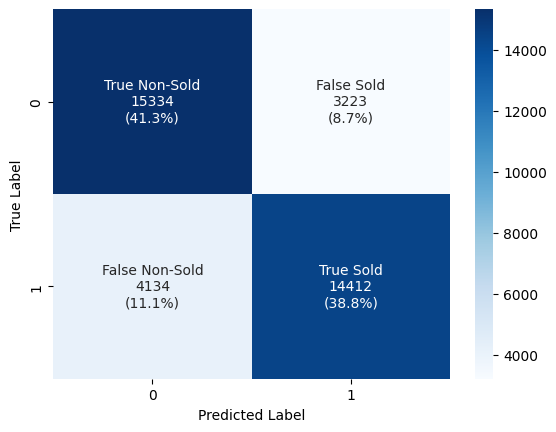

In [265]:
import seaborn as sns
import matplotlib.pyplot as plt
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Non-Sold", "False Sold", "False Non-Sold", "True Sold"]
group_counts = [value for value in cf_matrix.flatten()]
group_percentages = [f"{value:.1%}" for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n({v3})" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [266]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance)

             feature  importance
0      MarketingType    0.133545
3     StrengthFactor    0.124057
5          ItemCount    0.117599
8         stockvalue    0.109405
4           PriceReg    0.101061
7        LowNetPrice    0.095480
11     discount_rate    0.086565
6       LowUserPrice    0.085846
1      ReleaseNumber    0.063136
10          stockage    0.060832
2   New_Release_Flag    0.022474
9                MOC    0.000000


## XGBoost

In [267]:
from xgboost import XGBClassifier

# model = XGBClassifier(n_estimators=300, subsample=0.9, max_depth=4, learning_rate=0.1,
#                       gamma=0.5, colsample_bytree=1.0, importance_type='cover',
#                       reg_lambda = 1)
model = XGBClassifier(n_estimators=300)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [268]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"accuracy: {accuracy}")
print("\nconfusion matrix:")
print(confusion)
print("\nreport:")
print(report)

accuracy: 0.8159987063040725

confusion matrix:
[[15185  3372]
 [ 3455 15091]]

report:
              precision    recall  f1-score   support

         0.0       0.81      0.82      0.82     18557
         1.0       0.82      0.81      0.82     18546

    accuracy                           0.82     37103
   macro avg       0.82      0.82      0.82     37103
weighted avg       0.82      0.82      0.82     37103



Text(50.722222222222214, 0.5, 'True Label')

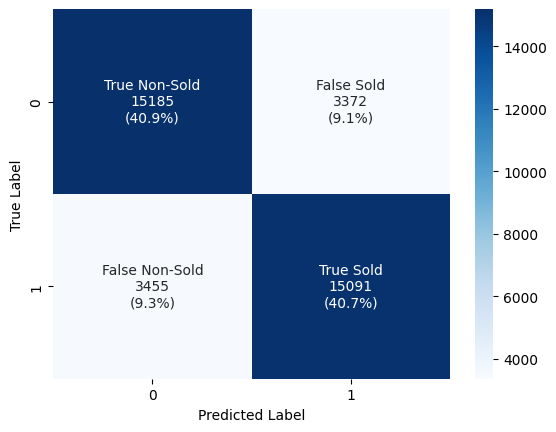

In [269]:
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Non-Sold", "False Sold", "False Non-Sold", "True Sold"]
group_counts = [value for value in cf_matrix.flatten()]
group_percentages = [f"{value:.1%}" for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n({v3})" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [270]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance)

             feature  importance
0      MarketingType    0.646932
2   New_Release_Flag    0.124840
1      ReleaseNumber    0.041971
3     StrengthFactor    0.032252
5          ItemCount    0.032042
4           PriceReg    0.027164
6       LowUserPrice    0.022957
11     discount_rate    0.020554
7        LowNetPrice    0.018469
10          stockage    0.017113
8         stockvalue    0.015707
9                MOC    0.000000


## KNN Classifier

In [271]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [272]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"accuracy: {accuracy}")
print("\nconfusion matrix:")
print(confusion)
print("\nreport:")
print(report)

accuracy: 0.7659757971053553

confusion matrix:
[[13488  5069]
 [ 3614 14932]]

report:
              precision    recall  f1-score   support

         0.0       0.79      0.73      0.76     18557
         1.0       0.75      0.81      0.77     18546

    accuracy                           0.77     37103
   macro avg       0.77      0.77      0.77     37103
weighted avg       0.77      0.77      0.77     37103



Text(50.722222222222214, 0.5, 'True Label')

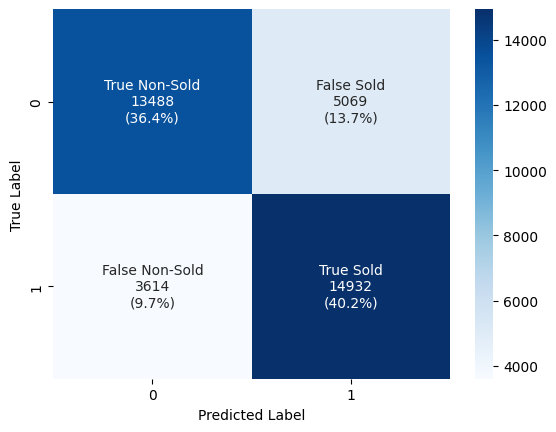

In [273]:
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Non-Sold", "False Sold", "False Non-Sold", "True Sold"]
group_counts = [value for value in cf_matrix.flatten()]
group_percentages = [f"{value:.1%}" for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n({v3})" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

## Logistic Regression

In [274]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=100000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [275]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"accuracy: {accuracy}")
print("\nconfusion matrix:")
print(confusion)
print("\nreport:")
print(report)

accuracy: 0.7405600625286365

confusion matrix:
[[13097  5460]
 [ 4166 14380]]

report:
              precision    recall  f1-score   support

         0.0       0.76      0.71      0.73     18557
         1.0       0.72      0.78      0.75     18546

    accuracy                           0.74     37103
   macro avg       0.74      0.74      0.74     37103
weighted avg       0.74      0.74      0.74     37103



Text(50.722222222222214, 0.5, 'True Label')

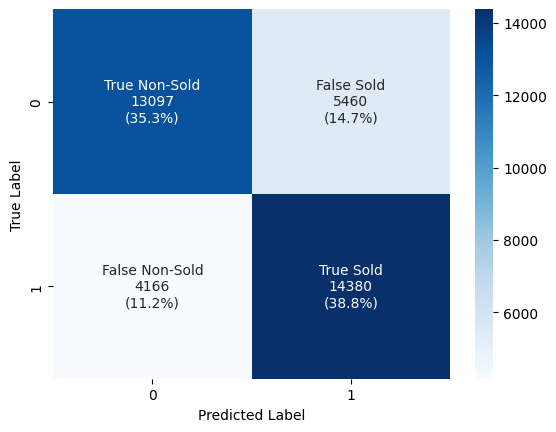

In [276]:
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Non-Sold", "False Sold", "False Non-Sold", "True Sold"]
group_counts = [value for value in cf_matrix.flatten()]
group_percentages = [f"{value:.1%}" for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n({v3})" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [277]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [278]:
X_train = pd.DataFrame(X_train, columns = X.columns)

In [279]:
import statsmodels.api as sm

logreg = sm.Logit(y_train, sm.add_constant(X_train)).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.533161
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               SoldFlag   No. Observations:                86573
Model:                          Logit   Df Residuals:                    86561
Method:                           MLE   Df Model:                           11
Date:                Thu, 12 Dec 2024   Pseudo R-squ.:                  0.2308
Time:                        15:50:51   Log-Likelihood:                -46157.
converged:                       True   LL-Null:                       -60008.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
MarketingType       -1.9659      0.018   -106.793      0.000      -2.002      -1.930
ReleaseNumb

In [280]:
import numpy as np

odds = np.exp(logreg.params)

for i in range(len(odds)):
    print(f'변수 {X_train.columns[i]}의 logit : {logreg.params[i] : .3f}')
    print(f'변수 {X_train.columns[i]}가 1단위 증가할 때, 판매일 로짓(odds ratio에 자연로그를 취한 값)이{logreg.params[i] : .3f}배 증가한다.')
    print(f'변수 {X_train.columns[i]}의 odds ratio : {odds[i] : .3f}')
    print(f'변수 {X_train.columns[i]}가 1단위 증가할 때, 판매일 확률(종속변수가 1일 확률)이 그렇지 않을 경우보다{odds[i] : .3f}배 증가한다.\n')

변수 MarketingType의 logit : -1.966
변수 MarketingType가 1단위 증가할 때, 판매일 로짓(odds ratio에 자연로그를 취한 값)이-1.966배 증가한다.
변수 MarketingType의 odds ratio :  0.140
변수 MarketingType가 1단위 증가할 때, 판매일 확률(종속변수가 1일 확률)이 그렇지 않을 경우보다 0.140배 증가한다.

변수 ReleaseNumber의 logit :  0.029
변수 ReleaseNumber가 1단위 증가할 때, 판매일 로짓(odds ratio에 자연로그를 취한 값)이 0.029배 증가한다.
변수 ReleaseNumber의 odds ratio :  1.029
변수 ReleaseNumber가 1단위 증가할 때, 판매일 확률(종속변수가 1일 확률)이 그렇지 않을 경우보다 1.029배 증가한다.

변수 New_Release_Flag의 logit : -0.827
변수 New_Release_Flag가 1단위 증가할 때, 판매일 로짓(odds ratio에 자연로그를 취한 값)이-0.827배 증가한다.
변수 New_Release_Flag의 odds ratio :  0.437
변수 New_Release_Flag가 1단위 증가할 때, 판매일 확률(종속변수가 1일 확률)이 그렇지 않을 경우보다 0.437배 증가한다.

변수 StrengthFactor의 logit : -0.000
변수 StrengthFactor가 1단위 증가할 때, 판매일 로짓(odds ratio에 자연로그를 취한 값)이-0.000배 증가한다.
변수 StrengthFactor의 odds ratio :  1.000
변수 StrengthFactor가 1단위 증가할 때, 판매일 확률(종속변수가 1일 확률)이 그렇지 않을 경우보다 1.000배 증가한다.

변수 PriceReg의 logit :  0.001
변수 PriceReg가 1단위 증가할 때, 판매일 로짓(odds ratio에 자연로그를 취한 값)이 0.001배 증가한다.
변수 

In [281]:
sig_level = .05
logistic_variable = pd.concat([logreg.params, np.exp(logreg.params), np.round(logreg.pvalues,4)], axis=1)
logistic_variable.columns = ['logit', 'odds ratio', 'p-value']
logistic_variable.loc[logistic_variable['p-value'] > sig_level, f'above {sig_level*100}%'] = 'No'
logistic_variable.loc[logistic_variable['p-value'] < sig_level, f'above {sig_level*100}%'] = 'Yes'
print(logistic_variable)

                         logit  odds ratio  p-value above 5.0%
MarketingType    -1.965873e+00    0.140034   0.0000        Yes
ReleaseNumber     2.892056e-02    1.029343   0.0000        Yes
New_Release_Flag -8.268791e-01    0.437412   0.0000        Yes
StrengthFactor   -4.007861e-07    1.000000   0.0000        Yes
PriceReg          8.879479e-04    1.000888   0.0000        Yes
ItemCount         9.821589e-03    1.009870   0.0000        Yes
LowUserPrice      4.789955e-04    1.000479   0.0108        Yes
LowNetPrice      -1.343600e-04    0.999866   0.2694         No
stockvalue       -2.628193e-06    0.999997   0.5636         No
MOC               7.640715e-04    1.000764   0.0000        Yes
stockage         -3.290012e-02    0.967635   0.0000        Yes
discount_rate     7.070660e-06    1.000007   0.3687         No


Text(50.722222222222214, 0.5, 'True Label')

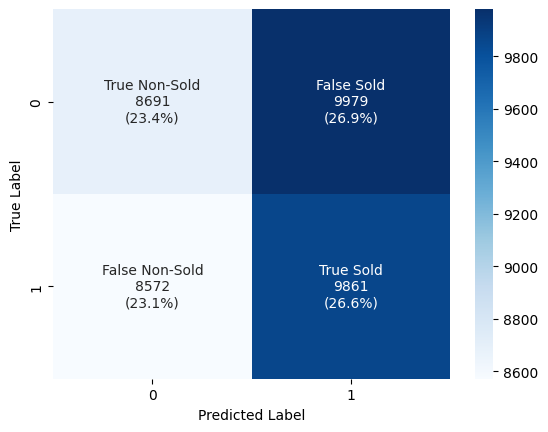

In [282]:
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Non-Sold", "False Sold", "False Non-Sold", "True Sold"]
group_counts = [value for value in cf_matrix.flatten()]
group_percentages = [f"{value:.1%}" for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n({v3})" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [283]:
from collections import Counter

def train_with_smote():
    smote = SMOTE(random_state=123)
    X_smote, y_smote = smote.fit_resample(X_train, y_train)
    
    clf = XGBClassifier(n_estimators=300)
    clf.fit(X_smote, y_smote)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"accuracy : {accuracy}")
    print("SMOTE result :")
    print(classification_report(y_test, y_pred))
    print("class distribution :", Counter(y_smote))
train_with_smote()

accuracy : 0.8164838422769048
SMOTE result :
              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82     18670
         1.0       0.82      0.81      0.82     18433

    accuracy                           0.82     37103
   macro avg       0.82      0.82      0.82     37103
weighted avg       0.82      0.82      0.82     37103

class distribution : Counter({0.0: 43405, 1.0: 43405})


## Decision Tree

In [284]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='gini', max_depth=3,)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [285]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"accuracy: {accuracy}")
print("\nconfusion matrix:")
print(confusion)
print("\nreport:")
print(report)

accuracy: 0.7317198070236908

confusion matrix:
[[12327  6343]
 [ 3611 14822]]

report:
              precision    recall  f1-score   support

         0.0       0.77      0.66      0.71     18670
         1.0       0.70      0.80      0.75     18433

    accuracy                           0.73     37103
   macro avg       0.74      0.73      0.73     37103
weighted avg       0.74      0.73      0.73     37103



Text(50.722222222222214, 0.5, 'True Label')

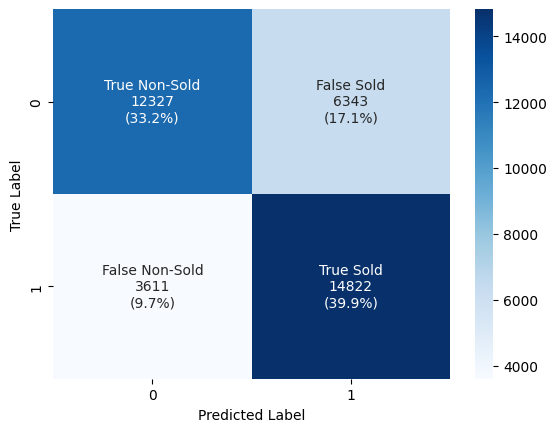

In [286]:
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Non-Sold", "False Sold", "False Non-Sold", "True Sold"]
group_counts = [value for value in cf_matrix.flatten()]
group_percentages = [f"{value:.1%}" for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n({v3})" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [287]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance)

             feature  importance
0      MarketingType    0.706723
3     StrengthFactor    0.207888
5          ItemCount    0.085389
1      ReleaseNumber    0.000000
2   New_Release_Flag    0.000000
4           PriceReg    0.000000
6       LowUserPrice    0.000000
7        LowNetPrice    0.000000
8         stockvalue    0.000000
9                MOC    0.000000
10          stockage    0.000000
11     discount_rate    0.000000


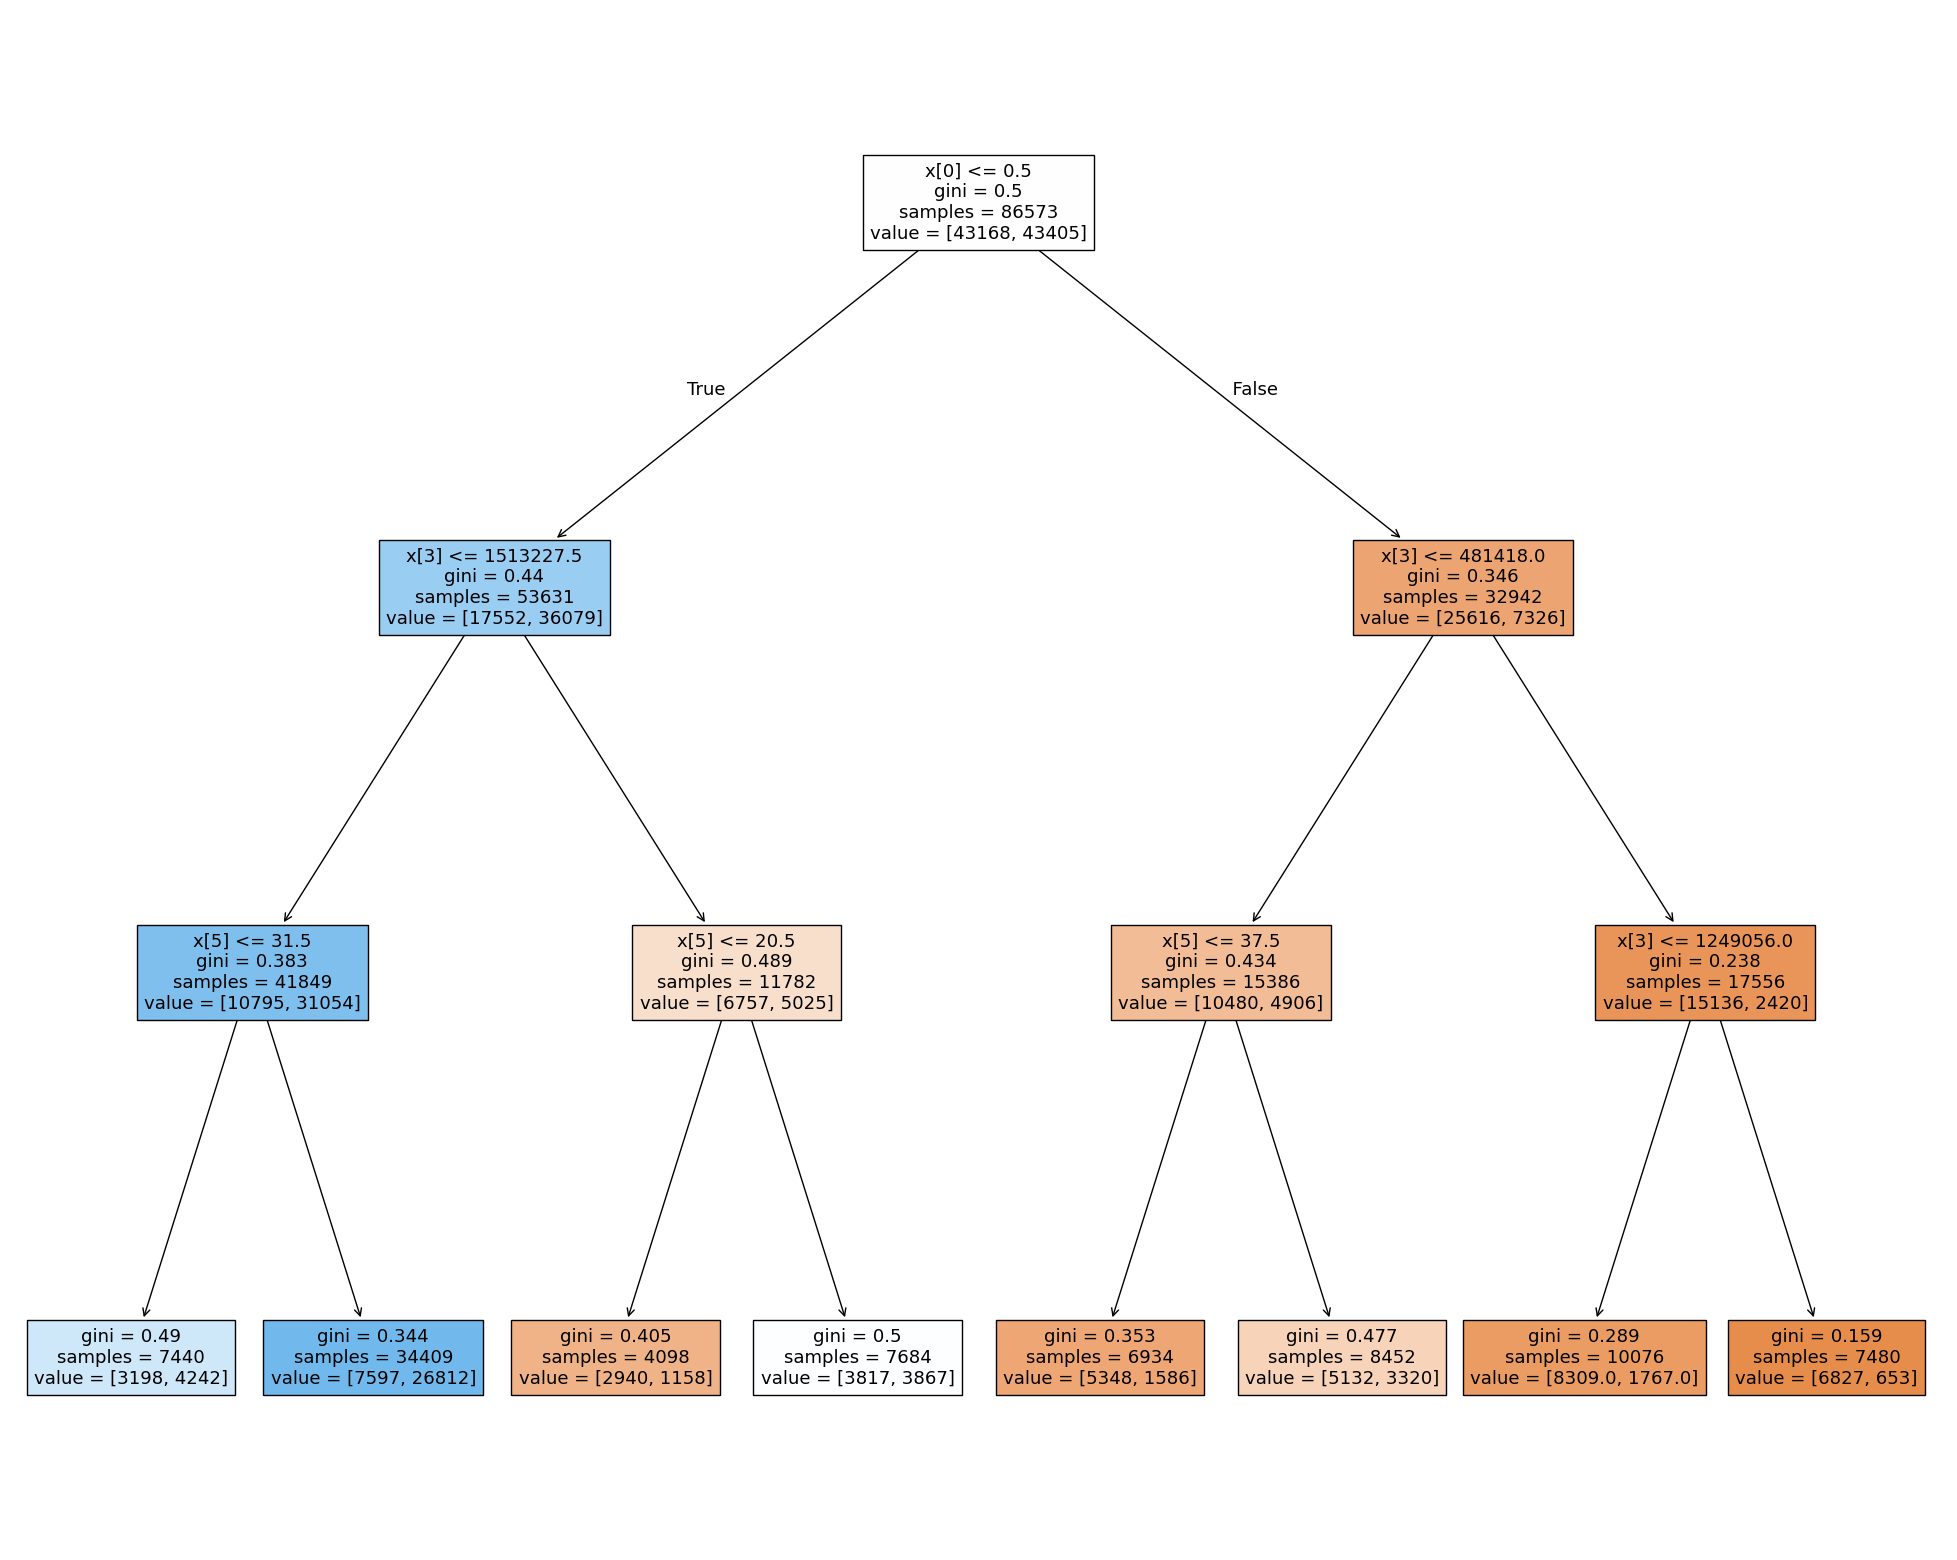

In [290]:
from sklearn import tree

tree.plot_tree(model, filled=True) 
plt.rcParams['figure.figsize'] = [35,30]

plt.savefig('DT.png', bbox_inches='tight')

In [289]:
X.columns

Index(['MarketingType', 'ReleaseNumber', 'New_Release_Flag', 'StrengthFactor',
       'PriceReg', 'ItemCount', 'LowUserPrice', 'LowNetPrice', 'stockvalue',
       'MOC', 'stockage', 'discount_rate'],
      dtype='object')